# BÀI TẬP XỬ LÝ ẢNH 
## Họ tên: Lê Nguyên Vũ Hoàng..............................................
## MSSV: 2174802010606.................................................
---
# Bài 1: Menu các phép biến đổi ảnh cơ bản

- Image inverse transformation
- Gamma-Correction
- Log Transformation
- Histogram equalization
- Contrast Stretching

Chọn I, G, L, H, C để thực hiện tương ứng.

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob

def show_img(img, title='', cmap=None):
    plt.figure(figsize=(5,5))
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

def save_img(img, path):
    cv2.imwrite(path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

# Đọc tất cả ảnh trong thư mục 'exercise'
img_paths = glob('exercise/*')
imgs = [cv2.cvtColor(cv2.imread(p), cv2.COLOR_BGR2RGB) for p in img_paths]
img_names = [os.path.basename(p) for p in img_paths]

In [8]:
# Các hàm biến đổi ảnh
def image_inverse(img):
    return 255 - img

def gamma_correction(img, gamma=2.2):
    img_norm = img / 255.0
    img_gamma = np.power(img_norm, gamma)
    return np.uint8(img_gamma * 255)

def log_transform(img):
    img_norm = img / 255.0
    c = 255 / np.log(1 + np.max(img_norm))
    img_log = c * np.log(1 + img_norm)
    return np.uint8(img_log * 255)

def hist_equalization(img):
    img_yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

def contrast_stretching(img):
    in_min = np.percentile(img, 2)
    in_max = np.percentile(img, 98)
    out = (img - in_min) * 255.0 / (in_max - in_min)
    out = np.clip(out, 0, 255)
    return np.uint8(out)


Chọn phép biến đổi:
I: Image Inverse
G: Gamma Correction
L: Log Transform
H: Histogram Equalization
C: Contrast Stretching


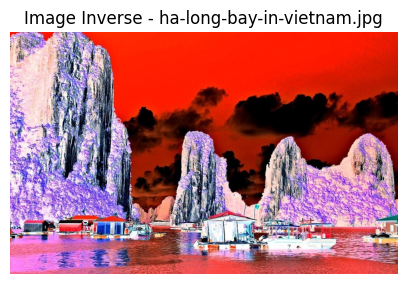

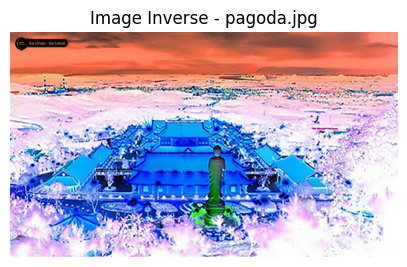

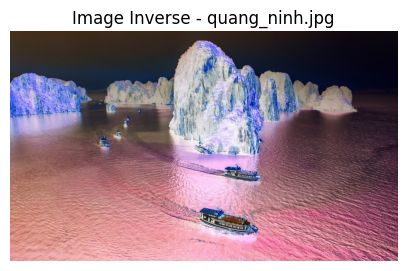

In [9]:
# Menu bài 1
menu1 = {
    'I': ('Image Inverse', image_inverse),
    'G': ('Gamma Correction', gamma_correction),
    'L': ('Log Transform', log_transform),
    'H': ('Histogram Equalization', hist_equalization),
    'C': ('Contrast Stretching', contrast_stretching)
}

print('Chọn phép biến đổi:')
for k, v in menu1.items():
    print(f'{k}: {v[0]}')
choice = input('Nhập I, G, L, H, C: ').upper()
if choice in menu1:
    func = menu1[choice][1]
    for img, name in zip(imgs, img_names):
        img_out = func(img)
        show_img(img_out, f'{menu1[choice][0]} - {name}')
        save_img(img_out, f'output1/{choice}_{name}')
else:
    print('Lựa chọn không hợp lệ!')

# Bài 2: Menu các phép biến đổi tần số
- Fast Fourier
- Butterworth Lowpass Filter
- Butterworth Highpass Filter

Chọn F, L, H để thực hiện tương ứng.

Chọn phép biến đổi tần số:
F: Fast Fourier
L: Butterworth Lowpass
H: Butterworth Highpass


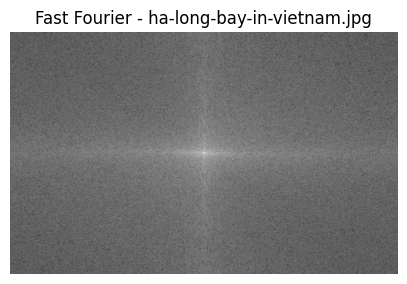

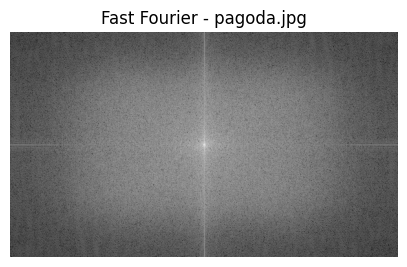

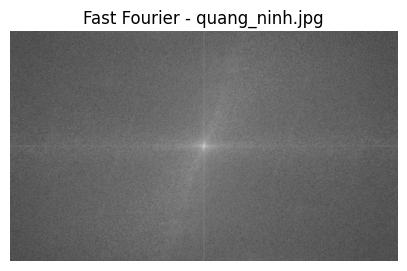

In [10]:
def fast_fourier(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    f = np.fft.fft2(img_gray)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift)+1)
    return np.uint8(255 * magnitude_spectrum / np.max(magnitude_spectrum))

def butterworth_filter(img, d0, n, type='low'):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    rows, cols = img_gray.shape
    crow, ccol = rows//2, cols//2
    u = np.arange(rows)
    v = np.arange(cols)
    U, V = np.meshgrid(u, v, indexing='ij')
    D = np.sqrt((U-crow)**2 + (V-ccol)**2)
    if type=='low':
        H = 1 / (1 + (D/d0)**(2*n))
    else:
        H = 1 / (1 + (d0/(D+1e-5))**(2*n))
    F = np.fft.fft2(img_gray)
    Fshift = np.fft.fftshift(F)
    Gshift = H * Fshift
    G = np.fft.ifftshift(Gshift)
    img_back = np.fft.ifft2(G)
    img_back = np.abs(img_back)
    return np.uint8(np.clip(img_back, 0, 255))

# Menu bài 2
menu2 = {
    'F': ('Fast Fourier', fast_fourier),
    'L': ('Butterworth Lowpass', lambda img: butterworth_filter(img, d0=30, n=2, type='low')),
    'H': ('Butterworth Highpass', lambda img: butterworth_filter(img, d0=30, n=2, type='high'))
}

print('Chọn phép biến đổi tần số:')
for k, v in menu2.items():
    print(f'{k}: {v[0]}')
choice2 = input('Nhập F, L, H: ').upper()
if choice2 in menu2:
    func = menu2[choice2][1]
    for img, name in zip(imgs, img_names):
        img_out = func(img)
        show_img(img_out, f'{menu2[choice2][0]} - {name}', cmap='gray')
        save_img(img_out, f'output2/{choice2}_{name}')
else:
    print('Lựa chọn không hợp lệ!')

# Bài 3: Đổi thứ tự màu RGB và chọn ngẫu nhiên phép biến đổi trong câu 1


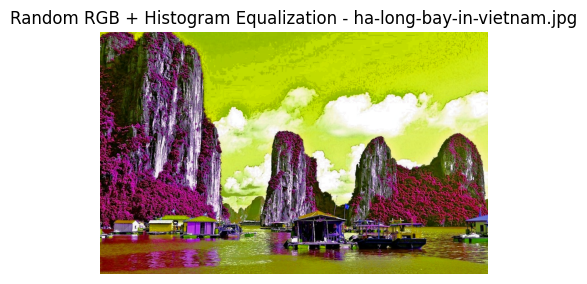

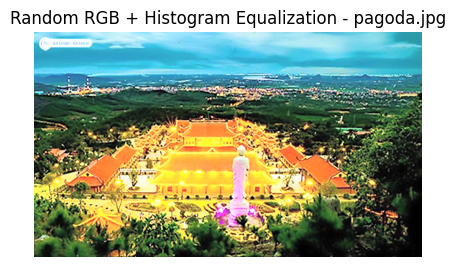

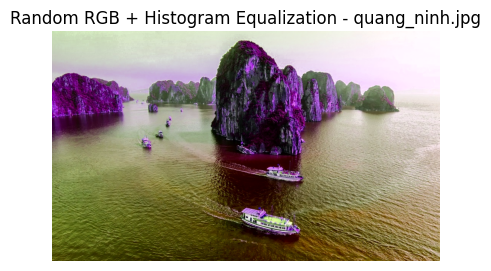

In [11]:
import random
def random_rgb_order(img):
    order = list(range(3))
    random.shuffle(order)
    return img[:,:,order]

rand_key = random.choice(list(menu1.keys()))
func = menu1[rand_key][1]
for img, name in zip(imgs, img_names):
    img_rgb = random_rgb_order(img)
    img_out = func(img_rgb)
    show_img(img_out, f'Random RGB + {menu1[rand_key][0]} - {name}')
    save_img(img_out, f'output3/{rand_key}_{name}')

# Bài 4: Đổi thứ tự màu RGB và chọn ngẫu nhiên phép biến đổi trong câu 2
Nếu Butterworth Lowpass thì thêm Min Filter, nếu Butterworth Highpass thì thêm Max Filter.

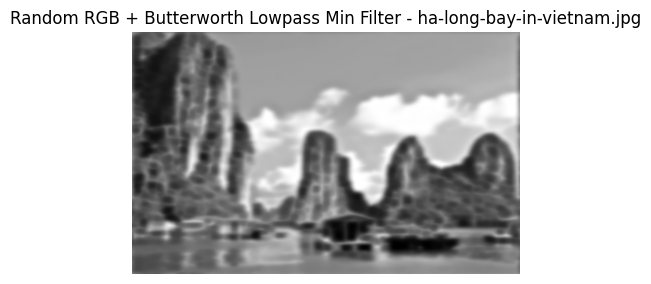

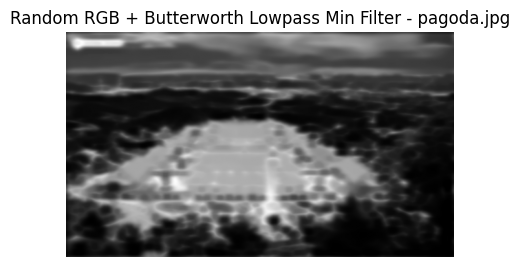

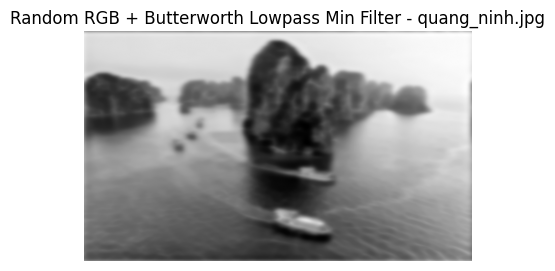

In [12]:
from scipy.ndimage import minimum_filter, maximum_filter
rand_key2 = random.choice(list(menu2.keys()))
func2 = menu2[rand_key2][1]
for img, name in zip(imgs, img_names):
    img_rgb = random_rgb_order(img)
    img_out = func2(img_rgb)
    if rand_key2 == 'L':
        img_out = minimum_filter(img_out, size=3)
        filter_name = 'Min Filter'
    elif rand_key2 == 'H':
        img_out = maximum_filter(img_out, size=3)
        filter_name = 'Max Filter'
    else:
        filter_name = ''
    show_img(img_out, f'Random RGB + {menu2[rand_key2][0]} {filter_name} - {name}', cmap='gray' if rand_key2 != 'F' else None)
    save_img(img_out, f'output4/{rand_key2}_{name}')